Training Accuracy: 1.0000
Validation (Test) Accuracy: 0.9750
Cross-Validation Mean Accuracy: 0.9950


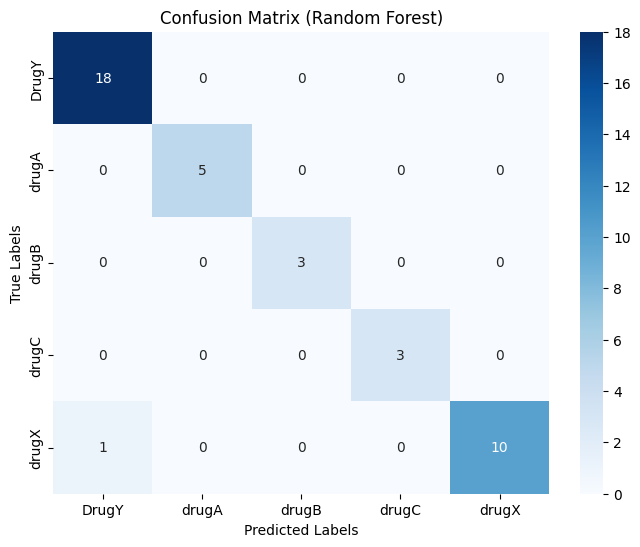


Classification Report:
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

from preprocessing import load_and_preprocess_data

# Load and preprocess
"""
Loads the dataset and applies preprocessing steps, including encoding
categorical features and scaling numerical ones.
"""
X_transformed, y, label_encoder, column_transformer = load_and_preprocess_data("drug200.csv")

# Train/test split
"""
Splits the transformed dataset into training and test sets with stratified sampling.
"""
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest Model
"""
Initializes and trains a Random Forest classifier using class weights
to handle class imbalance.
"""
rf_model = RandomForestClassifier(n_estimators=30, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
"""
Generates predictions on training and test datasets.
"""
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy
"""
Calculates accuracy for training and test predictions.
"""
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation
"""
Performs 5-fold stratified cross-validation to evaluate model performance.
"""
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_transformed, y, cv=cv, scoring='accuracy')

# Output results
"""
Prints training, test, and cross-validation accuracy scores.
"""
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation (Test) Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")

# Confusion Matrix
"""
Displays the confusion matrix for test predictions as a heatmap.
"""
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
"""
Prints a detailed classification report including precision, recall, and F1-score.
"""
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))
